# Imports



In [68]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [116]:
# Importing dataset

train_df = pd.read_csv("./dataset/train.csv")
test_df = pd.read_csv("./dataset/test.csv")
submission = pd.read_csv("./dataset/sample_submission.csv")
features =  (train_df.columns)
target = "Depression"

In [118]:
features[:-1]

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness'],
      dtype='object')

# Automated Exploratory Data Analysis

In [95]:
# from ydata_profiling import ProfileReport

In [96]:
# profile = ProfileReport(train_df.iloc[:,:-1], title ="Profile Report")

In [97]:
# profile

# Exploratory Data Analysis

In [98]:
train_df.isna().sum().sort_values(ascending = False)

Study Satisfaction                       112803
Academic Pressure                        112803
CGPA                                     112802
Profession                                36630
Work Pressure                             27918
Job Satisfaction                          27910
Financial Stress                              4
Dietary Habits                                4
Degree                                        2
Gender                                        0
Name                                          0
id                                            0
Age                                           0
City                                          0
Working Professional or Student               0
Sleep Duration                                0
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [99]:
test_df.isna().sum().sort_values(ascending = False)

CGPA                                     75034
Academic Pressure                        75033
Study Satisfaction                       75033
Profession                               24632
Work Pressure                            18778
Job Satisfaction                         18774
Dietary Habits                               5
Degree                                       2
Gender                                       0
id                                           0
Name                                         0
City                                         0
Age                                          0
Working Professional or Student              0
Sleep Duration                               0
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

In [100]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [101]:
train_df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [102]:
submission.head()

,id,Depression
0,140700,0
1,140701,0
2,140702,0
3,140703,0
4,140704,0


In [103]:
# Droppiong "id" 

train_df.drop( ["id"], axis =  1, inplace = True)
test_df.drop( ["id"], axis = 1, inplace = True)


## Descriptive Statistics

In [104]:
train_df.iloc[:,:-1].describe().T.sort_values(by="std", ascending =False)

,count,mean,std,min,25%,50%,75%,max
Age,140700.0,40.388621,12.384099,18.00,29.00,42.00,51.00,60.0
Work/Study Hours,140700.0,6.252679,3.853615,0.00,3.00,6.00,10.00,12.0
CGPA,27898.0,7.658636,1.464466,5.03,6.29,7.77,8.92,10.0
Job Satisfaction,112790.0,2.974404,1.416078,1.00,2.00,3.00,4.00,5.0
Financial Stress,140696.0,2.988983,1.413633,1.00,2.00,3.00,4.00,5.0
Work Pressure,112782.0,2.998998,1.405771,1.00,2.00,3.00,4.00,5.0
Academic Pressure,27897.0,3.142273,1.380457,1.00,2.00,3.00,4.00,5.0
Study Satisfaction,27897.0,2.944940,1.360197,1.00,2.00,3.00,4.00,5.0


## Missing value Distribution

In [105]:
train_null = pd.DataFrame(train_df.iloc[:, :-1].isna().sum())
train_null = train_null.sort_values(by = 0, ascending = True)
test_null = pd.DataFrame(test_df.isna().sum())
test_null = test_null.sort_values(by=0, ascending = True)

In [106]:
print("missed train")
print(train_null.tail())
print("missed test")
print(test_null.tail())

missed train
                         0
Work Pressure        27918
Profession           36630
CGPA                112802
Study Satisfaction  112803
Academic Pressure   112803
missed test
                        0
Work Pressure       18778
Profession          24632
Academic Pressure   75033
Study Satisfaction  75033
CGPA                75034


In [107]:
# Importing plotly libraries
import warnings
warnings.filterwarnings("ignore")#

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
import gc

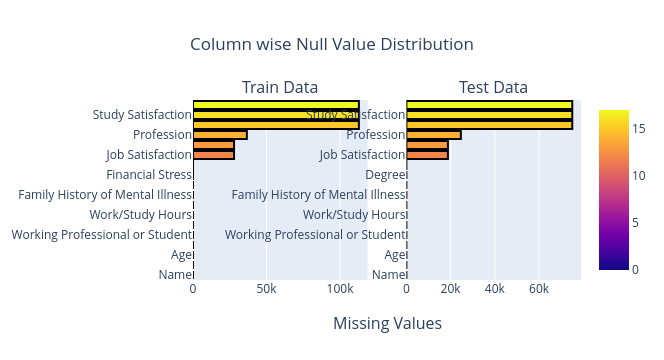

In [108]:
fig = make_subplots(rows = 1, cols = 2, column_titles= ["Train Data", "Test Data"], x_title = "Missing Values")
fig.add_trace(go.Bar(x = train_null[0],
                     y = train_null.index, 
                     orientation = "h", 
                     marker= dict(color = [n for n in range(18)], 
                                  line_color="rgb(0,0,0)", 
                                  line_width = 2,
                                  coloraxis="coloraxis")), 
              1,1)

fig.add_trace(go.Bar(x = test_null[0],
                     y = test_null.index,
                     orientation = "h",
                     marker= dict(color= [n for n in range(18)],
                                  line_color="rgb(0,0,0)",
                                  line_width = 2,
                                  coloraxis = "coloraxis")),
              1,2)

fig.update_layout(showlegend = False, title_text="Column wise Null Value Distribution", title_x = 0.5)
                                  

In [109]:
# Row wise null value distribution

missing_train_row = train_df.isna().sum(axis = 1)
missing_train_row = pd.DataFrame(missing_train_row.value_counts()/
                                 train_df.shape[0]).reset_index()

missing_test_row = test_df.isna().sum(axis = 1)
missing_test_row = pd.DataFrame(missing_test_row.value_counts()/test_df.shape[0]).reset_index()

missing_train_row.columns = ["No", "Count"]
missing_test_row.columns = ["No", "Count"]

missing_train_row["Count"] = missing_train_row["Count"]*100
missing_test_row["Count"] = missing_test_row["Count"]*100

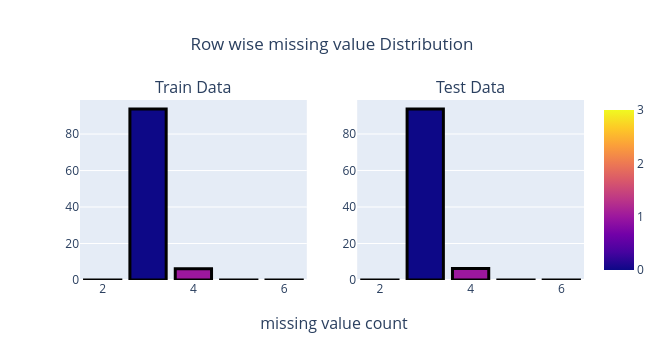

In [110]:

fig = make_subplots( rows = 1,
                    cols = 2,
                    column_titles = ["Train Data", "Test Data"],
                    x_title = " missing value count")

fig.add_trace(go.Bar( x = missing_train_row["No"],
                     y = missing_train_row["Count"],
                     marker = dict(color = [n for n in range(4)],
                                   line_color="rgb(0,0,0)",
                                   line_width = 3,
                                   coloraxis = "coloraxis")),
              1,1)
                     
fig.add_trace(go.Bar( x = missing_test_row["No"],
                     y = missing_test_row["Count"],
                     marker = dict(color = [n for n in range(4)],
                                   line_color = "rgb(0,0,0)",
                                   line_width = 3,
                                   coloraxis = "coloraxis")),
              1,2)

fig.update_layout(showlegend = False, title_text = "Row wise missing value Distribution", title_x = 0.5)

fig.show()

In [139]:
features[2:-1]

Index(['Gender', 'Age', 'City', 'Working Professional or Student',
       'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness'],
      dtype='object')

In [136]:
# Feature Data type distribution


df = pd.concat([train_df[features[2:-1]],test_df[features[2:-1]]], axis = 0)
text_features = ["Name"]
numerical_features = df.select_dtypes(include=["float"]).columns
categorical_features = df.select_dtypes(include=["object"]).columns
categorical_features = categorical_features[1:]


In [143]:
df.head()

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No
1,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No
2,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No
3,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes
4,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes


In [137]:

print(f"Total number features : {len(features[1:-1])}")
print(f"Number of categorical features : {len(categorical_features)}")
print(f"Number of Numerical features : {len(numerical_features)}")
print(f"Number of text features : {len(text_features)}")

Total number features : 18
Number of categorical features : 8
Number of Numerical features : 8
Number of text features : 1


In [149]:
features[2:-1]

Index(['Gender', 'Age', 'City', 'Working Professional or Student',
       'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness'],
      dtype='object')

In [151]:
cat_features = [ col for col in features[2:-1] if df[col].nunique() <25 ]
cont_features = [col for col in features[2:-1] if df[col].nunique() >= 25]

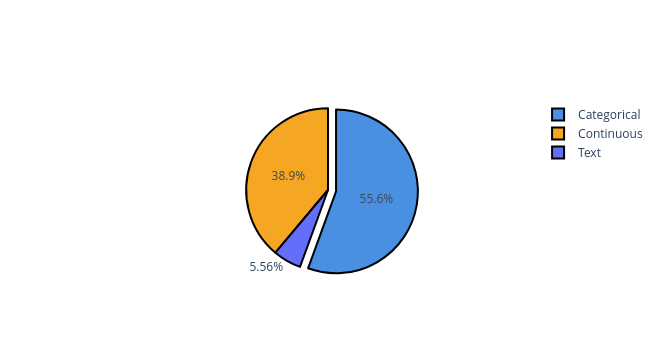

In [154]:
labels = ["Categorical", "Continuous", "Text"]
values = [len(cat_features), len(cont_features), len(text_features)]
colors = ["#4A90E2", "#F5A623"]

fig = go.Figure(data = [go.Pie(labels =labels,
                               values = values, pull=[0.1, 0 ,0],
                               marker = dict(colors= colors,
                                             line=dict(color="#000000",
                                             width =2)
                                            )
                              )
                       ]
               )
fig.show()